# Milestone 1: Dataset exploration

## Requirements

In [2]:
%%capture
!pip install -q kagglehub

In [4]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import textwrap
print("imports done!")

imports done!


# Download datasets

In [11]:
# Global Happiness Scores and Factors Dataset
gh_path = kagglehub.dataset_download("sazidthe1/global-happiness-scores-and-factors")
print("Path to global happiness dataset files:", gh_path)

# Mental Health Dataset
mh_path = kagglehub.dataset_download("programmerrdai/mental-health-dataset")
print("Path to mental health dataset files:", mh_path)

# Quality of Life Index Dataset
qol_path = kagglehub.dataset_download("marcelobatalhah/quality-of-life-index-by-country")
print("Path to quality of life dataset files:", qol_path)

# ---

# csv files in gh_path:
gh_files = glob.glob(gh_path + "/*.csv")
print("\n \033[1m>>> Global Happiness Dataset Files:\033[0m")
for file in gh_files:
    print(os.path.basename(file))

# csv files in mh_path:
mh_files = glob.glob(mh_path + "/*.csv")
print("\n \033[1m>>> Mental Health Dataset Files:\033[0m")
for file in mh_files:
    print(os.path.basename(file))
    
# csv files in qol_path:
qol_files = glob.glob(qol_path + "/*.csv")
print("\n \033[1m>>> Quality of Life Dataset Files:\033[0m")
for file in qol_files:
    print(os.path.basename(file))


Path to global happiness dataset files: /Users/andreamiele/.cache/kagglehub/datasets/sazidthe1/global-happiness-scores-and-factors/versions/1
Path to mental health dataset files: /Users/andreamiele/.cache/kagglehub/datasets/programmerrdai/mental-health-dataset/versions/1
Path to quality of life dataset files: /Users/andreamiele/.cache/kagglehub/datasets/marcelobatalhah/quality-of-life-index-by-country/versions/2

 >>> Global Happiness Dataset Files:
WHR_2015.csv
WHR_2016.csv
WHR_2017.csv
WHR_2019.csv
WHR_2018.csv
WHR_2020.csv
WHR_2021.csv
WHR_2023.csv
WHR_2022.csv

 >>> Mental Health Dataset Files:
prevalence-by-mental-and-substance-use-disorder.csv
share-with-mental-and-substance-disorders.csv
prevalence-of-depression-males-vs-females.csv
mental-and-substance-use-as-share-of-disease.csv
share-with-depression.csv
share-with-mental-or-substance-disorders-by-sex.csv

 >>> Quality of Life Dataset Files:
quality_of_life_indices_by_country.csv


## Check datasets

### Global happiness

In [12]:
# merge csv files in global happiness dataset
gh_files = glob.glob(os.path.join(gh_path, "WHR_*.csv"))
global_happiness_dfs = []
for file in gh_files:
    df = pd.read_csv(file)
    year = int(os.path.basename(file).split("WHR_")[1].split(".csv")[0])
    df["Year"] = year
    global_happiness_dfs.append(df)

global_happiness_df = pd.concat(global_happiness_dfs, ignore_index=True)
print("\n=== Global Happiness Dataset Combined ===")
print(global_happiness_df.info())
print(global_happiness_df.describe())
print("Missing Values in Global Happiness Dataset:\n", global_happiness_df.isnull().sum())


=== Global Happiness Dataset Combined ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       1367 non-null   object 
 1   region                        1367 non-null   object 
 2   happiness_score               1367 non-null   float64
 3   gdp_per_capita                1367 non-null   float64
 4   social_support                1367 non-null   float64
 5   healthy_life_expectancy       1366 non-null   float64
 6   freedom_to_make_life_choices  1367 non-null   float64
 7   generosity                    1367 non-null   float64
 8   perceptions_of_corruption     1366 non-null   float64
 9   Year                          1367 non-null   int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 106.9+ KB
None
       happiness_score  gdp_per_capita  social_support  \
count      1367

### Mental Health

In [ ]:
mh_files = glob.glob(os.path.join(mh_path, "*.csv"))
for file in mh_files:
    print(f"\n--- Analyzing Mental Health File: {os.path.basename(file)} ---")
    df = pd.read_csv(file)
    print(df.info())
    print(df.describe())
    print("Missing Values:\n", df.isnull().sum())


--- Analyzing Mental Health File: prevalence-by-mental-and-substance-use-disorder.csv ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 10 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   Entity                                                                            6840 non-null   object 
 1   Code                                                                              6150 non-null   object 
 2   Year                                                                              6840 non-null   int64  
 3   Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)          6840 non-null   float64
 4   Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)       6840 non-null   float64
 5   Prevalence - Eating 

### Quality of life

In [28]:
qol_file = os.path.join(qol_path, "quality_of_life_indices_by_country.csv")
qol_df = pd.read_csv(qol_file)
print("\n=== Quality of Life Index Dataset ===")
print(qol_df.info())
print(qol_df.describe())
print("Missing Values in Quality of Life Dataset:\n", qol_df.isnull().sum())


=== Quality of Life Index Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1495 entries, 0 to 1494
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            1495 non-null   int64  
 1   Country                         1495 non-null   object 
 2   Quality of Life Index           1495 non-null   float64
 3   Purchasing Power Index          1495 non-null   float64
 4   Safety Index                    1495 non-null   float64
 5   Health Care Index               1495 non-null   float64
 6   Cost of Living Index            1495 non-null   float64
 7   Property Price to Income Ratio  1495 non-null   float64
 8   Traffic Commute Time Index      1495 non-null   float64
 9   Pollution Index                 1495 non-null   float64
 10  Climate Index                   1495 non-null   object 
 11  Year                            1495 non-null   object 


# Global Happiness Scores and Factors

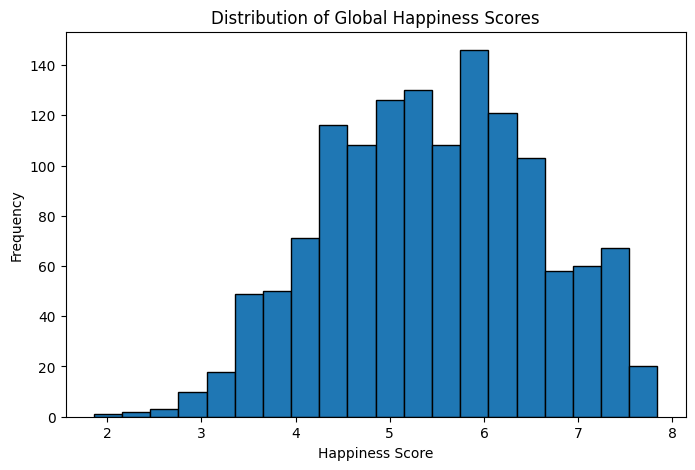

<Figure size 640x480 with 0 Axes>

In [38]:
plt.figure(figsize=(8, 5))
plt.hist(global_happiness_df["happiness_score"].dropna(), bins=20, edgecolor="black")
plt.title("Distribution of Global Happiness Scores")
plt.xlabel("Happiness Score")
plt.ylabel("Frequency")
plt.show()
plt.savefig("figures/happiness_score_distribution.png")

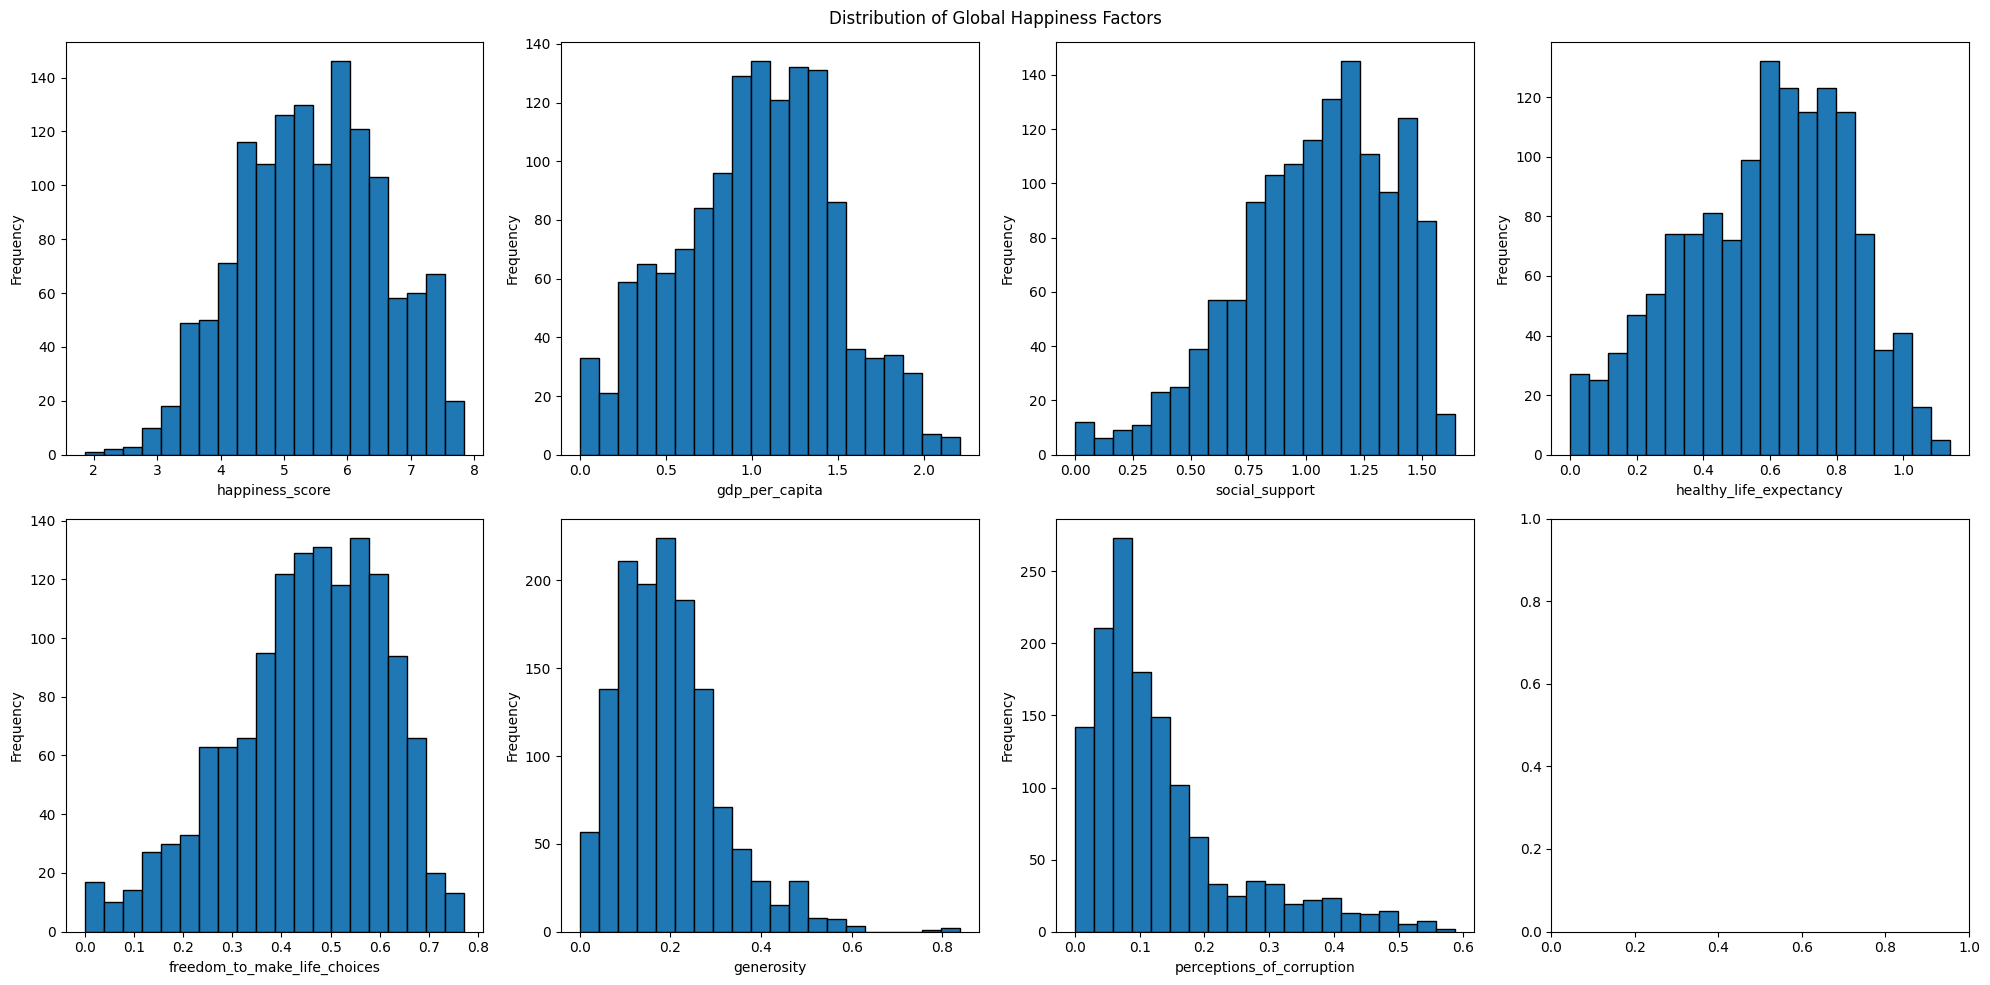

<Figure size 640x480 with 0 Axes>

In [39]:
numeric_columns = [
    "happiness_score", "gdp_per_capita", "social_support", "healthy_life_expectancy",
    "freedom_to_make_life_choices", "generosity", "perceptions_of_corruption", "Year"
]
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.flatten()
fig.suptitle("Distribution of Global Happiness Factors")
for i, col in enumerate(numeric_columns):
    if col!="Year":
        axes[i].hist(global_happiness_df[col].dropna(), bins=20, edgecolor='black')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Frequency")
plt.tight_layout()
plt.show()
plt.savefig("figures/happiness_factors_distribution.png")

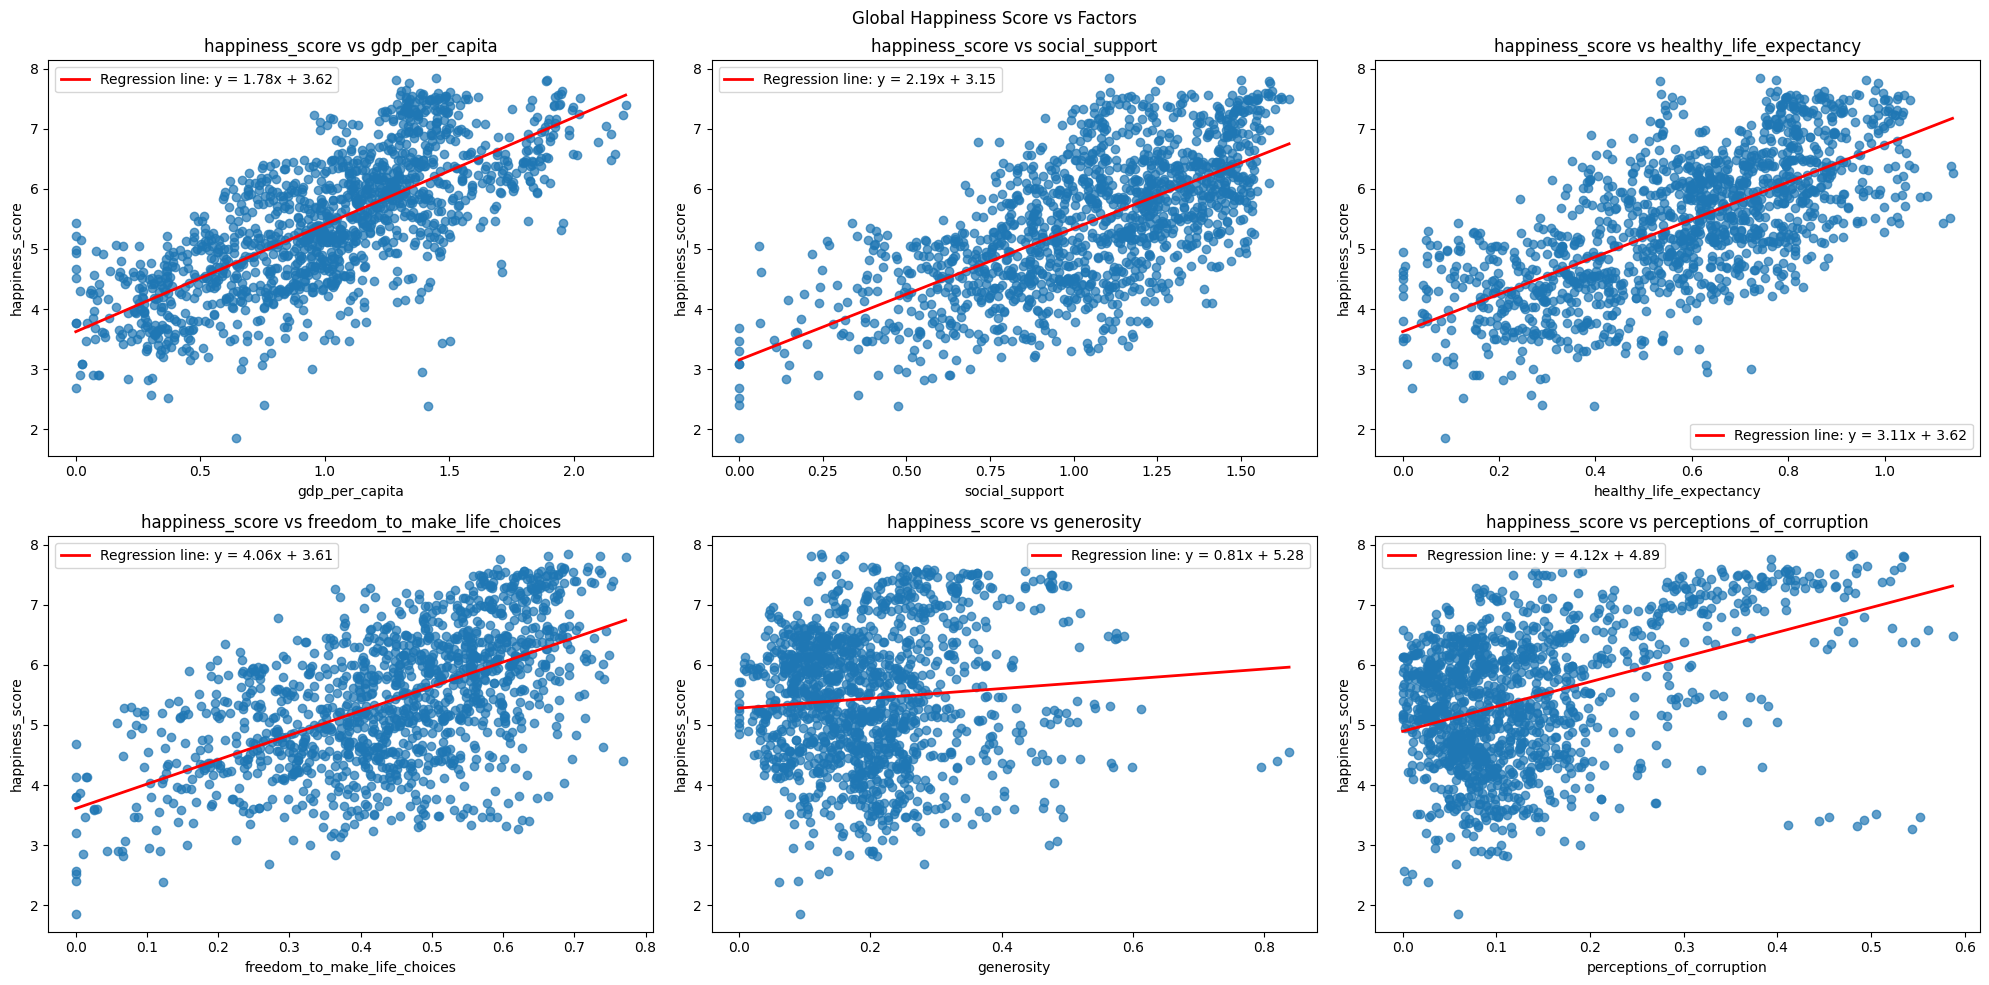

<Figure size 640x480 with 0 Axes>

In [40]:
factors = [
    "gdp_per_capita", "social_support", "healthy_life_expectancy",
    "freedom_to_make_life_choices", "generosity", "perceptions_of_corruption"
]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axes = axes.flatten()
fig.suptitle("Global Happiness Score vs Factors")
for i, factor in enumerate(factors):
    x = global_happiness_df[factor]
    y = global_happiness_df["happiness_score"]
    mask = x.notna() & y.notna()
    x_clean = x[mask]
    y_clean = y[mask]
    
    axes[i].scatter(x_clean, y_clean, alpha=0.7)
    
    # Compute regression line
    m, b = np.polyfit(x_clean, y_clean, 1)
    x_vals = np.linspace(x_clean.min(), x_clean.max(), 100)
    y_vals = m * x_vals + b
    axes[i].plot(x_vals, y_vals, color='red', lw=2, label=f'Regression line: y = {m:.2f}x + {b:.2f}')
    
    axes[i].set_xlabel(factor)
    axes[i].set_ylabel("happiness_score")
    axes[i].set_title(f"happiness_score vs {factor}")
    axes[i].legend()

plt.tight_layout()
plt.show()
plt.savefig("figures/happiness_score_vs_factors.png")

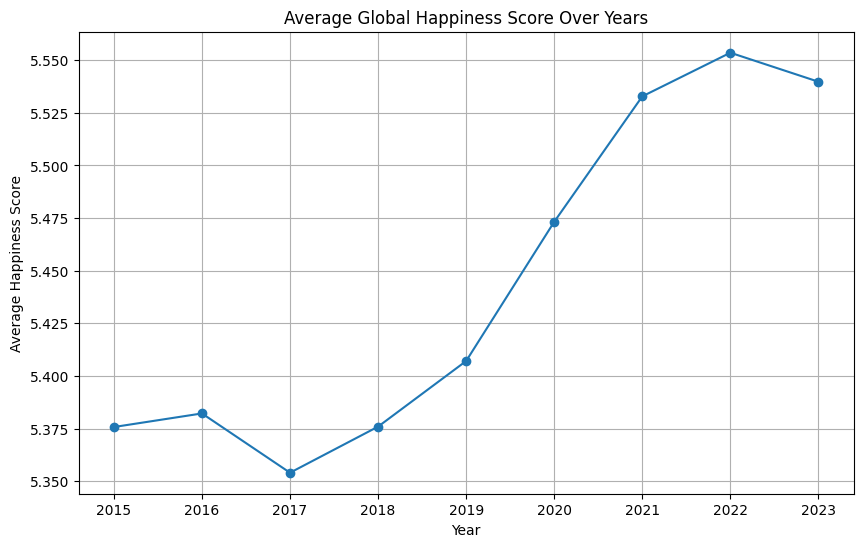

<Figure size 640x480 with 0 Axes>

In [41]:
plt.figure(figsize=(10, 6))
gh_by_year = global_happiness_df.groupby("Year")["happiness_score"].mean()
plt.plot(gh_by_year.index, gh_by_year.values, marker="o")
plt.title("Average Global Happiness Score Over Years")
plt.xlabel("Year")
plt.ylabel("Average Happiness Score")
plt.grid(True)
plt.show()
plt.savefig("figures/average_happiness_score_over_years.png")

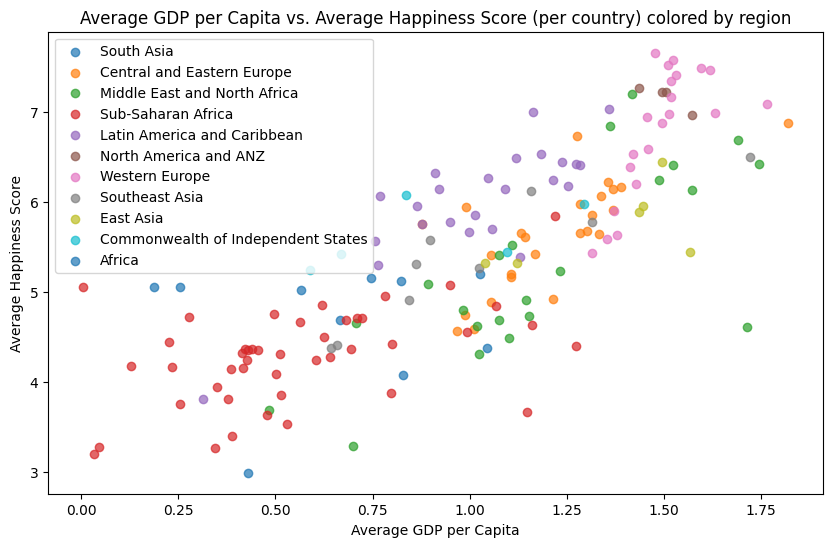

<Figure size 640x480 with 0 Axes>

In [42]:
per_country = global_happiness_df.groupby("country").agg({
    "happiness_score": "mean",
    "gdp_per_capita": "mean",
    "social_support": "mean",
    "healthy_life_expectancy": "mean",
    "freedom_to_make_life_choices": "mean",
    "generosity": "mean",
    "perceptions_of_corruption": "mean"
}).reset_index()

country_region = global_happiness_df.groupby("country")["region"].first().reset_index()
per_country = per_country.merge(country_region, on="country", how="left")

unique_regions = per_country["region"].unique()
colors = plt.cm.tab10.colors
color_dict = {region: colors[i % len(colors)] for i, region in enumerate(unique_regions)}

plt.figure(figsize=(10,6))
for region in unique_regions:
    sub = per_country[per_country["region"] == region]
    plt.scatter(sub["gdp_per_capita"], sub["happiness_score"], color=color_dict[region],
                label=region, alpha=0.7)
plt.title("Average GDP per Capita vs. Average Happiness Score (per country) colored by region")
plt.xlabel("Average GDP per Capita")
plt.ylabel("Average Happiness Score")
plt.legend()
plt.show()
plt.savefig("figures/gdp_per_capita_vs_happiness_score.png")

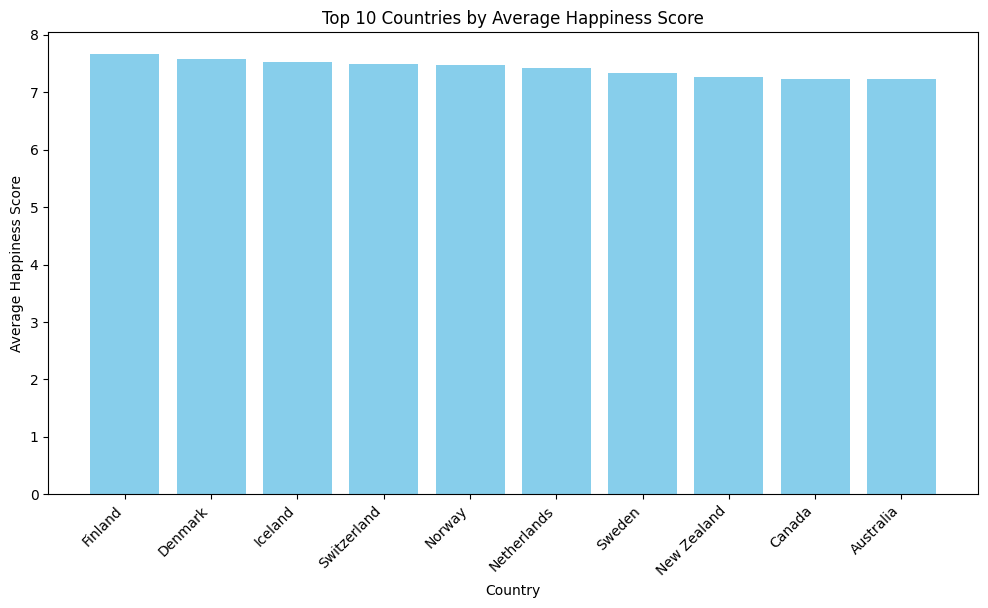

<Figure size 640x480 with 0 Axes>

In [43]:
top10 = per_country.sort_values("happiness_score", ascending=False).head(10)
plt.figure(figsize=(12, 6))
plt.bar(top10["country"], top10["happiness_score"], color="skyblue")
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Countries by Average Happiness Score")
plt.xlabel("Country")
plt.ylabel("Average Happiness Score")
plt.show()
plt.savefig("figures/top10_countries_by_happiness_score.png")

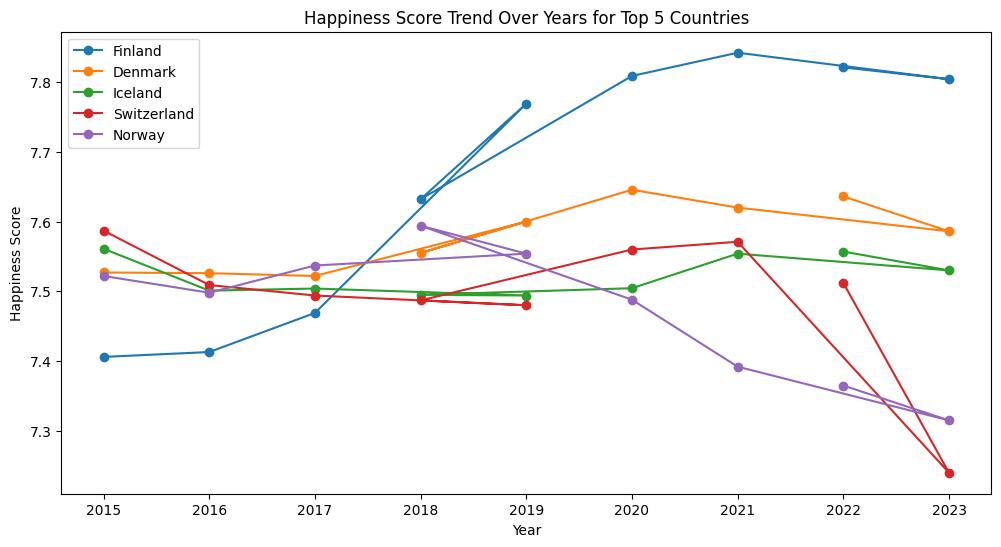

<Figure size 640x480 with 0 Axes>

In [44]:
top5_countries = top10["country"].head(5).tolist()
plt.figure(figsize=(12, 6))
for country in top5_countries:
    country_data = global_happiness_df[global_happiness_df["country"] == country]
    plt.plot(country_data["Year"], country_data["happiness_score"], marker="o", label=country)
plt.title("Happiness Score Trend Over Years for Top 5 Countries")
plt.xlabel("Year")
plt.ylabel("Happiness Score")
plt.legend()
plt.show()
plt.savefig("figures/happiness_score_trend_top5_countries.png")


# Mental Health Dataset

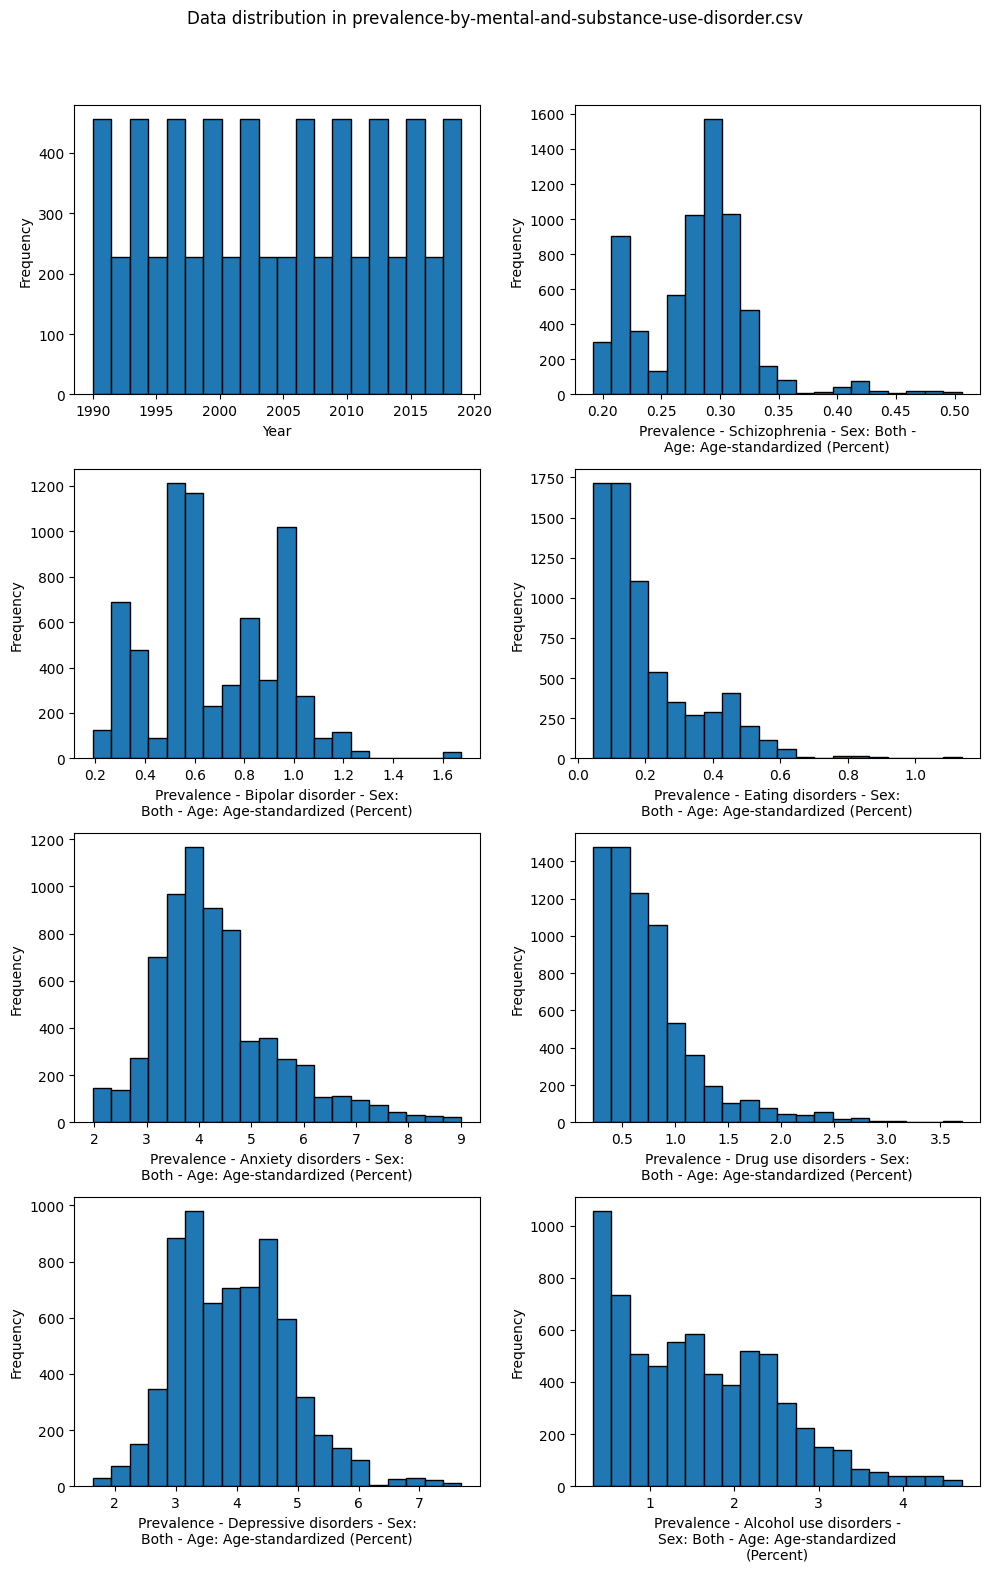

<Figure size 640x480 with 0 Axes>

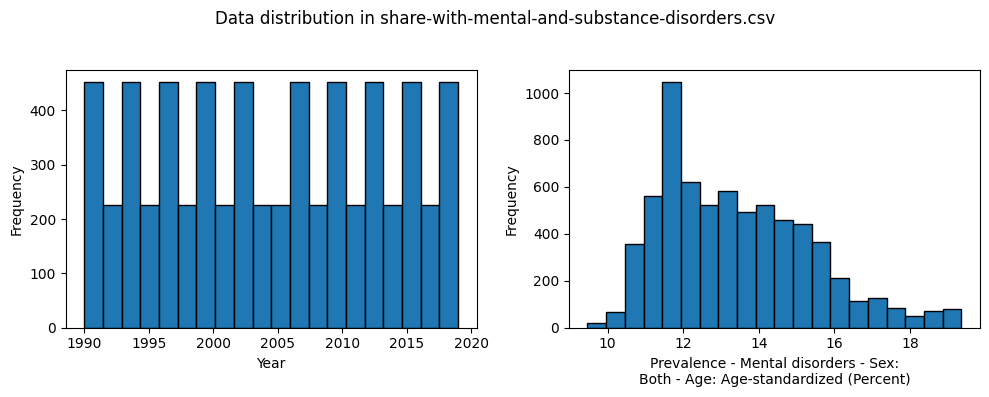

<Figure size 640x480 with 0 Axes>

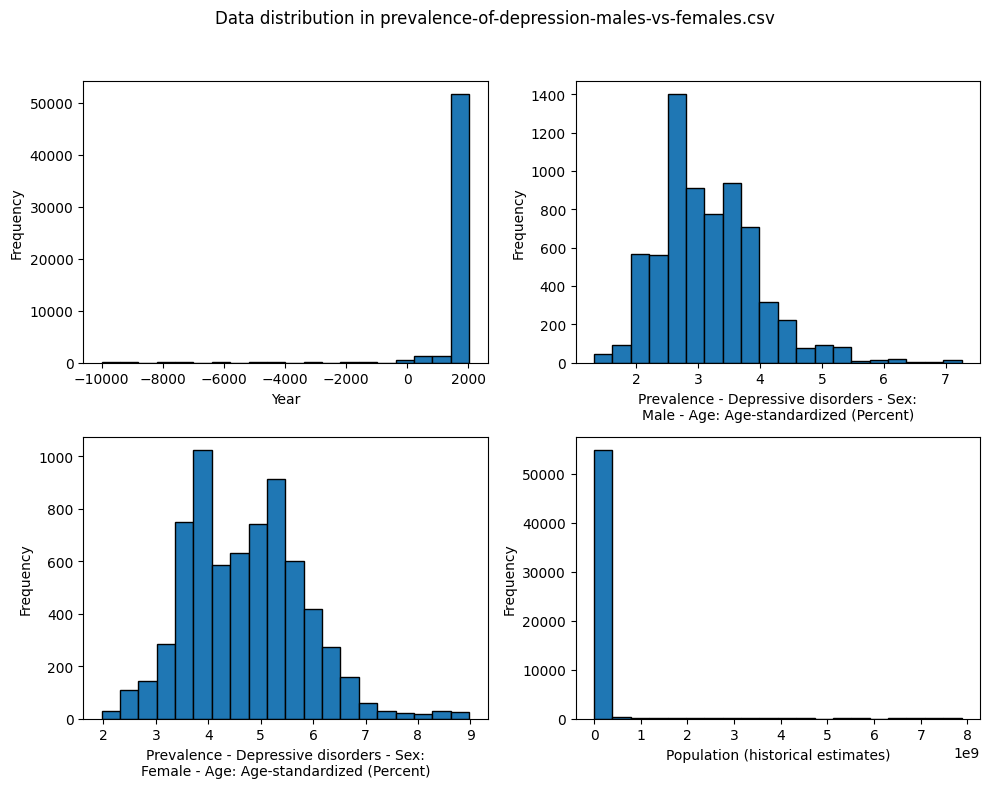

<Figure size 640x480 with 0 Axes>

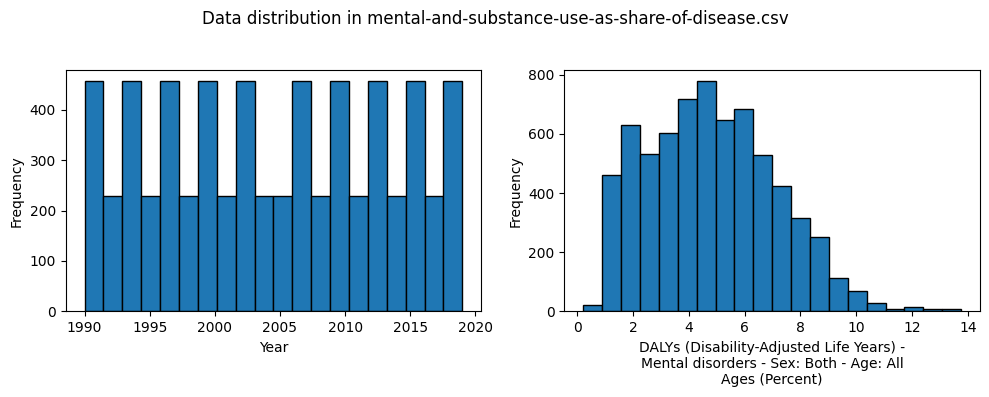

<Figure size 640x480 with 0 Axes>

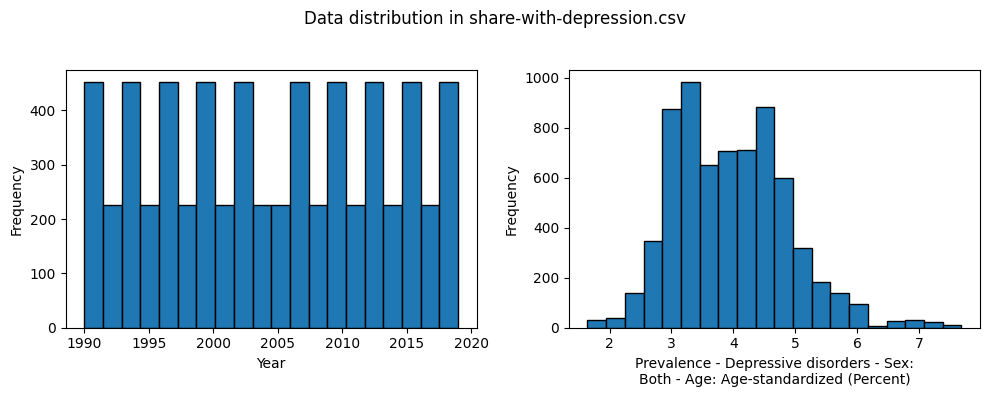

<Figure size 640x480 with 0 Axes>

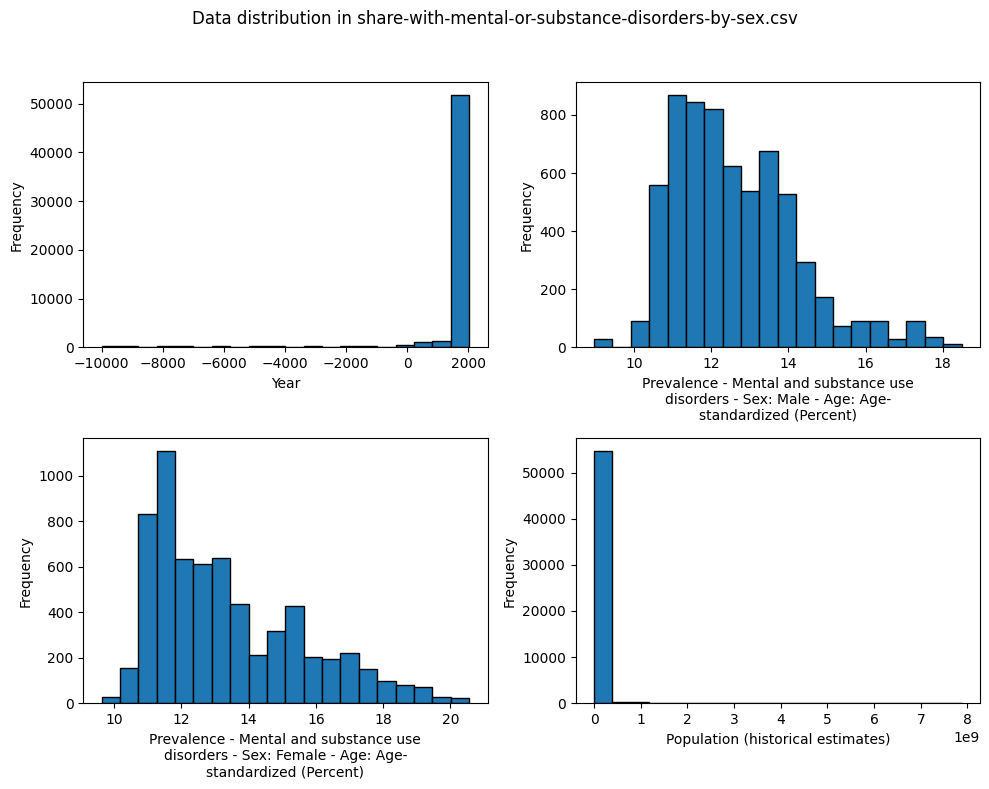

<Figure size 640x480 with 0 Axes>

In [45]:
for file in mh_files:
    df = pd.read_csv(file)  
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if numeric_cols:
        ncols = 2  
        nrows = (len(numeric_cols) + ncols - 1) // ncols 
        fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 4 * nrows))
        axes = axes.flatten()  
        for i, col in enumerate(numeric_cols):
            axes[i].hist(df[col].dropna(), bins=20, edgecolor='black')
            wrapped_col = textwrap.fill(col, width=40)
            axes[i].set_xlabel(wrapped_col, fontsize=10)
            axes[i].set_ylabel("Frequency", fontsize=10)

        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])
        fig.suptitle(f"Data distribution in {os.path.basename(file)}", fontsize=12)
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()
        plt.savefig(f"figures/data_distribution_{os.path.basename(file)}.png")

### Merging the csvs into one df

In [18]:
files = {
    "prevalence_all": "prevalence-by-mental-and-substance-use-disorder.csv",
    "share_mental_sub": "share-with-mental-and-substance-disorders.csv",
    "depression_mf": "prevalence-of-depression-males-vs-females.csv",
    "dalys": "mental-and-substance-use-as-share-of-disease.csv",
    "share_depression": "share-with-depression.csv",
    "share_by_sex": "share-with-mental-or-substance-disorders-by-sex.csv"
}
dfs = {}
for key, filename in files.items():
    path = os.path.join(mh_path, filename)
    df = pd.read_csv(path)
    key_cols = ['Entity', 'Code', 'Year']
    new_columns = {}
    for col in df.columns:
        if col not in key_cols:
            new_columns[col] = f"{key}_{col}"
    df.rename(columns=new_columns, inplace=True)
    dfs[key] = df
merged_df = None
for key, df in dfs.items():
    if merged_df is None:
        merged_df = df
    else:
        merged_df = pd.merge(merged_df, df, on=key_cols, how="outer")

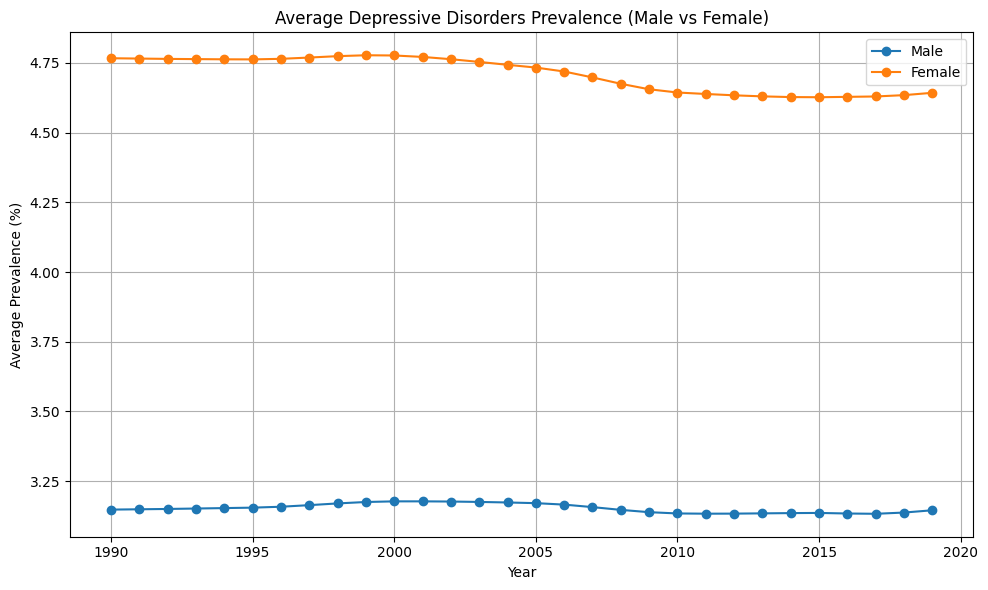

<Figure size 640x480 with 0 Axes>

In [46]:
merged_df["Year"] = pd.to_numeric(merged_df["Year"], errors="coerce")
ts_depression = merged_df.groupby("Year").agg({
    "depression_mf_Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)": "mean",
    "depression_mf_Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)": "mean"
}).reset_index()

plt.figure(figsize=(10, 6))
plt.plot(ts_depression["Year"], ts_depression["depression_mf_Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)"],
         marker="o", label="Male")
plt.plot(ts_depression["Year"], ts_depression["depression_mf_Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)"],
         marker="o", label="Female")
plt.xlabel("Year")
plt.ylabel("Average Prevalence (%)")
plt.title("Average Depressive Disorders Prevalence (Male vs Female)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig(f"figures/depression_prevalence_male_female.png")

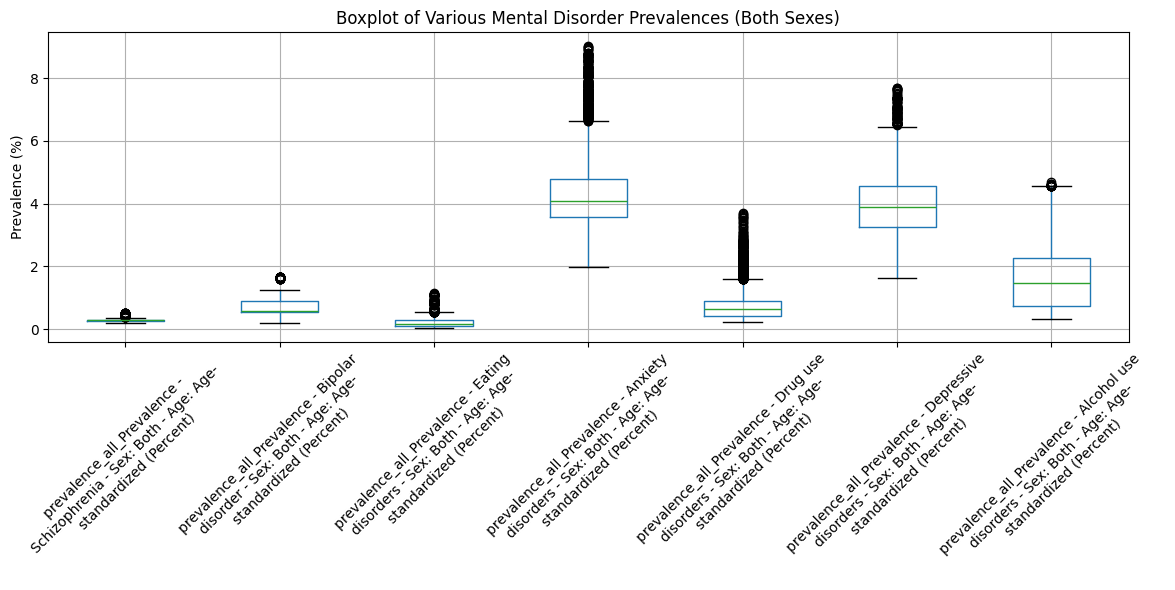

<Figure size 640x480 with 0 Axes>

In [47]:
prevalence_all_cols = [col for col in merged_df.columns if col.startswith("prevalence_all_")]
df_prevalence_all = merged_df[prevalence_all_cols]
wrapped_cols = [textwrap.fill(col, width=40) for col in prevalence_all_cols]
plt.figure(figsize=(12, 6))
ax = df_prevalence_all.boxplot(rot=45)
ax.set_xticklabels(wrapped_cols, rotation=45, fontsize=10)
plt.title("Boxplot of Various Mental Disorder Prevalences (Both Sexes)", fontsize=12)
plt.ylabel("Prevalence (%)", fontsize=10)
plt.tight_layout()
plt.show()
plt.savefig(f"figures/mental_disorder_prevalence_boxplot.png")

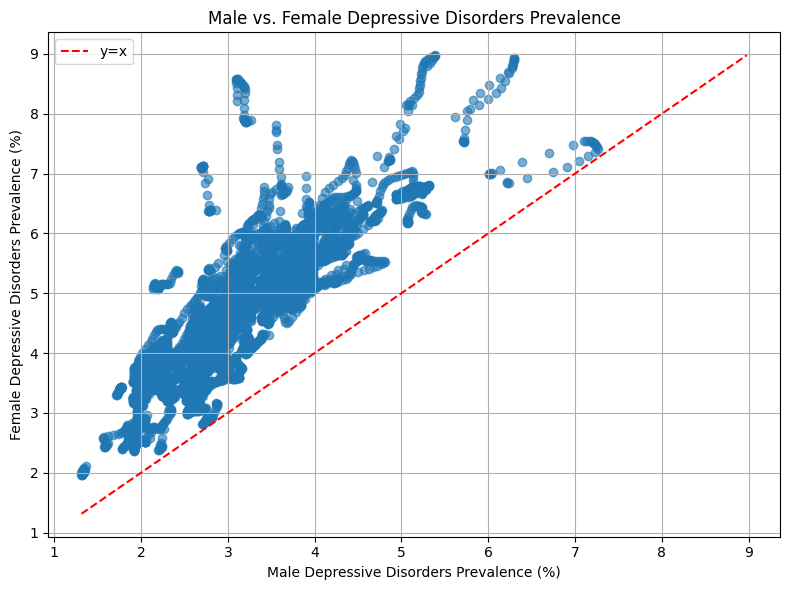

<Figure size 640x480 with 0 Axes>

In [48]:
x = merged_df["depression_mf_Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)"]
y = merged_df["depression_mf_Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)"]

plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.6)

lims = [min(x.min(), y.min()), max(x.max(), y.max())]
plt.plot(lims, lims, 'r--', label="y=x")
plt.xlabel("Male Depressive Disorders Prevalence (%)")
plt.ylabel("Female Depressive Disorders Prevalence (%)")
plt.title("Male vs. Female Depressive Disorders Prevalence")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig(f"figures/male_female_depressive_disorders_prevalence.png")

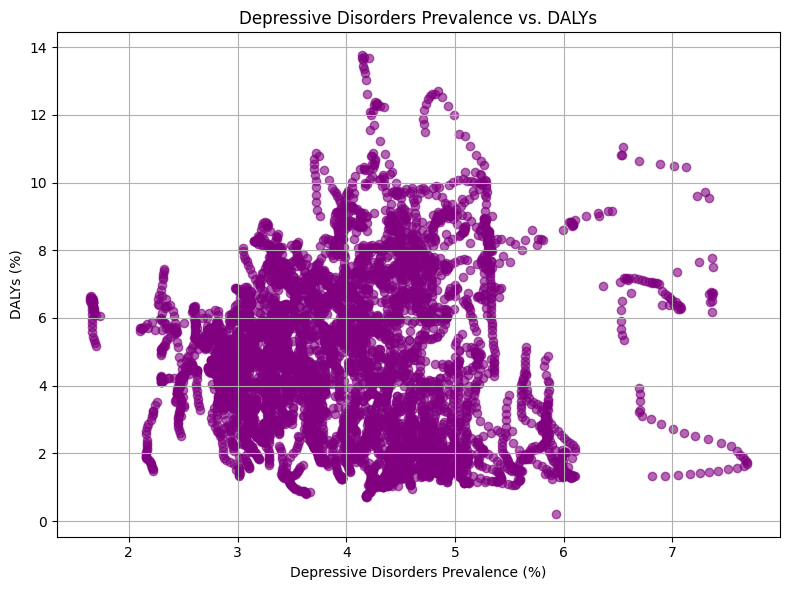

<Figure size 640x480 with 0 Axes>

In [49]:
x2 = merged_df["share_depression_Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)"]
y2 = merged_df["dalys_DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)"]

plt.figure(figsize=(8, 6))
plt.scatter(x2, y2, alpha=0.6, color="purple")
plt.xlabel("Depressive Disorders Prevalence (%)")
plt.ylabel("DALYs (%)")
plt.title("Depressive Disorders Prevalence vs. DALYs")
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig(f"figures/depressive_disorders_prevalence_vs_dalys.png")

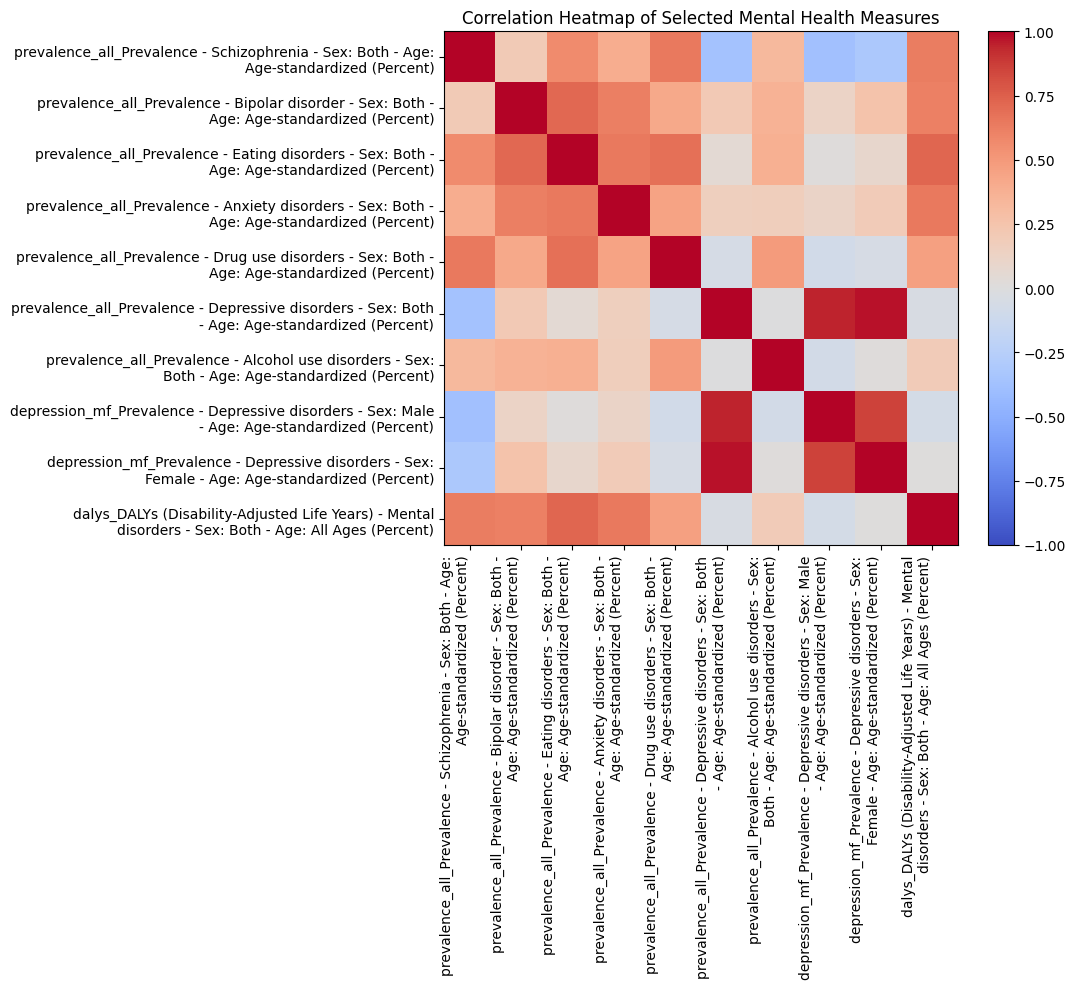

<Figure size 640x480 with 0 Axes>

In [50]:
cols_for_corr = []
cols_for_corr.extend(prevalence_all_cols)
cols_for_corr.append("depression_mf_Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)")
cols_for_corr.append("depression_mf_Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)")
cols_for_corr.append("dalys_DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)")

corr_data = merged_df[cols_for_corr].dropna(how="all")
corr_matrix = corr_data.corr()

plt.figure(figsize=(12, 10))
cax = plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(cax, fraction=0.046, pad=0.04)
plt.xticks(range(len(corr_matrix.columns)), [textwrap.fill(col, 60) for col in corr_matrix.columns], rotation=90, ha="right")
plt.yticks(range(len(corr_matrix.index)), [textwrap.fill(col, 60) for col in corr_matrix.index])
plt.title("Correlation Heatmap of Selected Mental Health Measures")
plt.tight_layout()
plt.show()
plt.savefig(f"figures/correlation_heatmap_mh.png")

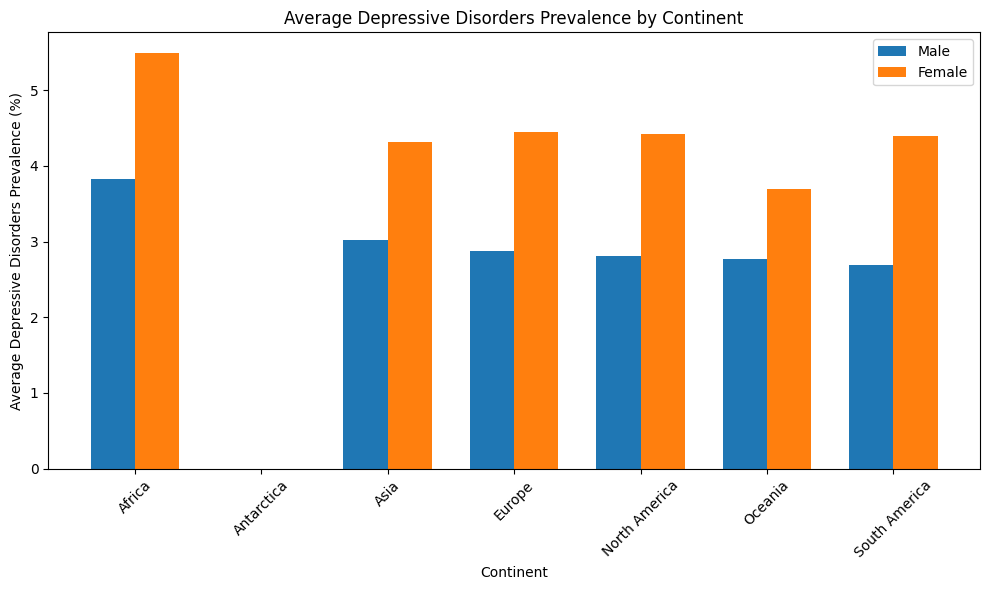

<Figure size 640x480 with 0 Axes>

In [52]:
df_continent = merged_df[merged_df["depression_mf_Continent"].notnull()]
grouped_cont = df_continent.groupby("depression_mf_Continent").agg({
    "depression_mf_Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)": "mean",
    "depression_mf_Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)": "mean"
}).reset_index()

x = np.arange(len(grouped_cont))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, grouped_cont["depression_mf_Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)"],
        width, label="Male")
plt.bar(x + width/2, grouped_cont["depression_mf_Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)"],
        width, label="Female")
plt.xlabel("Continent")
plt.ylabel("Average Depressive Disorders Prevalence (%)")
plt.title("Average Depressive Disorders Prevalence by Continent")
plt.xticks(x, grouped_cont["depression_mf_Continent"], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig(f"figures/depressive_disorders_prevalence_by_continent.png")

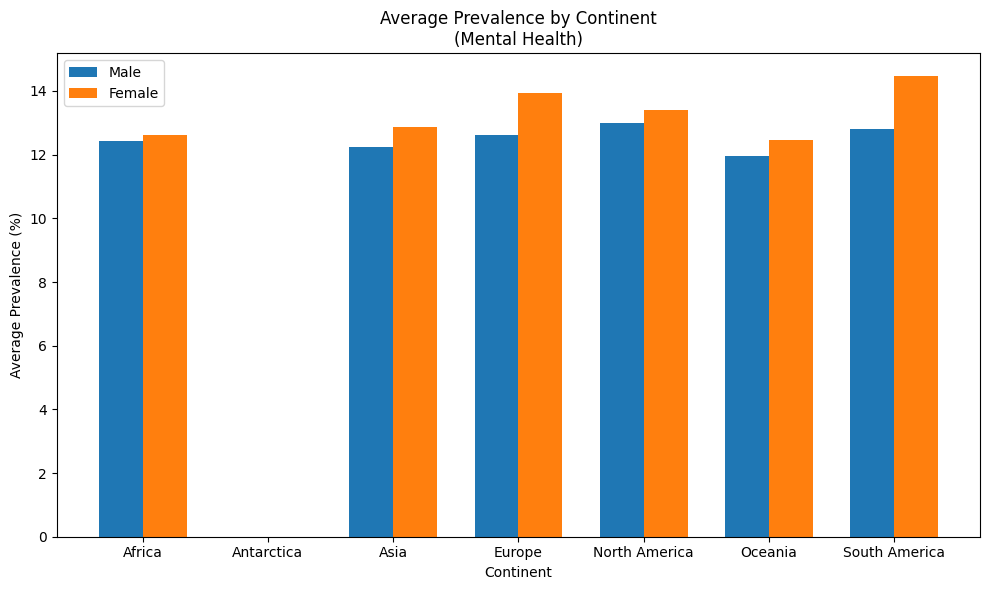

<Figure size 640x480 with 0 Axes>

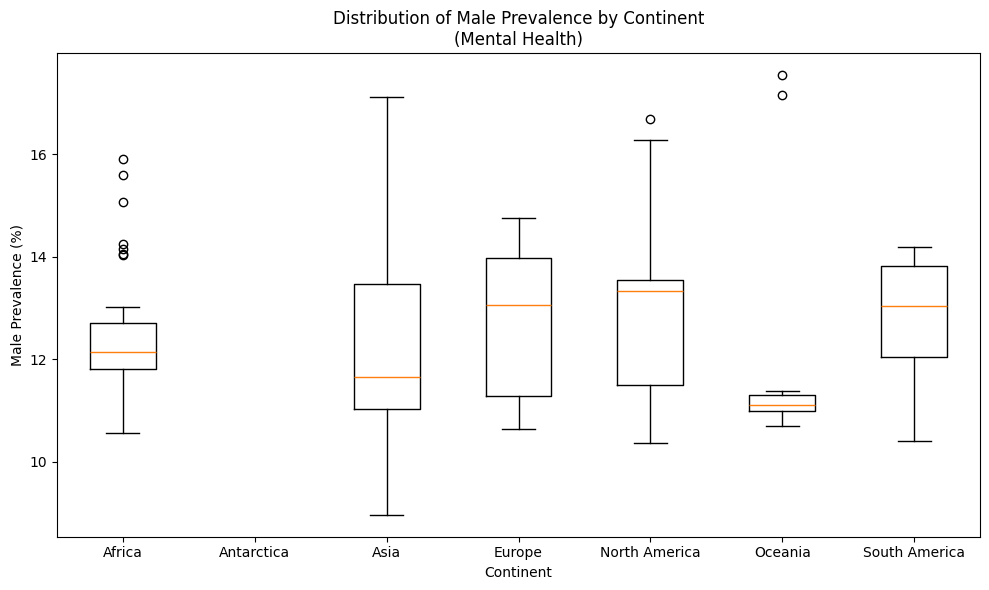

<Figure size 640x480 with 0 Axes>

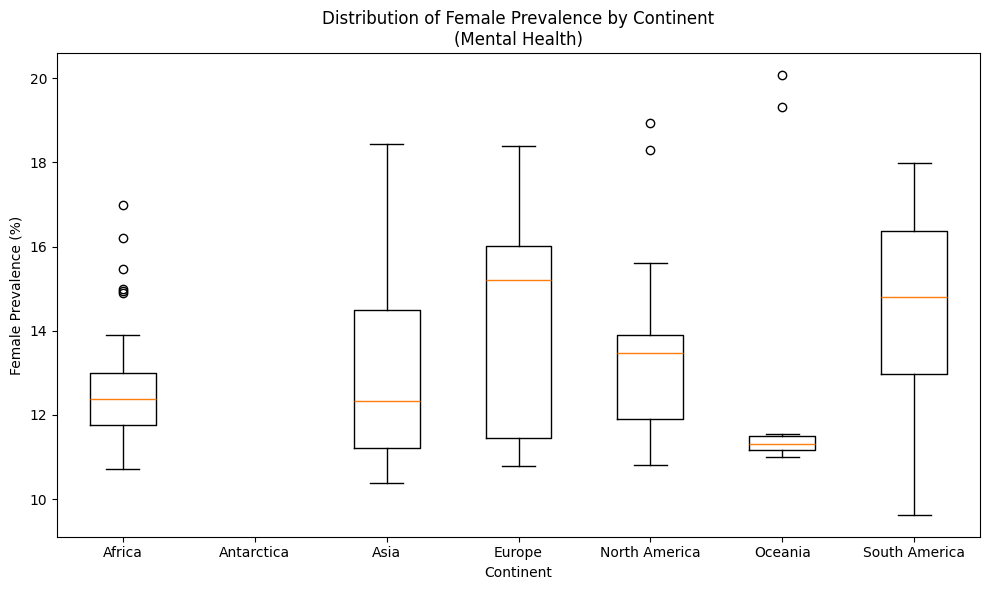

<Figure size 640x480 with 0 Axes>

In [53]:
mh_file = os.path.join(mh_path, "share-with-mental-or-substance-disorders-by-sex.csv")
mh_df = pd.read_csv(mh_file)
mh_continent = mh_df[mh_df["Continent"].notnull()]

grouped_mh = mh_continent.groupby("Continent").agg({
    "Prevalence - Mental and substance use disorders - Sex: Male - Age: Age-standardized (Percent)": "mean",
    "Prevalence - Mental and substance use disorders - Sex: Female - Age: Age-standardized (Percent)": "mean"
}).reset_index()

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
indices = np.arange(len(grouped_mh))
ax.bar(indices, 
       grouped_mh["Prevalence - Mental and substance use disorders - Sex: Male - Age: Age-standardized (Percent)"],
       width=bar_width, label="Male")
ax.bar(indices + bar_width, 
       grouped_mh["Prevalence - Mental and substance use disorders - Sex: Female - Age: Age-standardized (Percent)"],
       width=bar_width, label="Female")
ax.set_xlabel("Continent")
ax.set_ylabel("Average Prevalence (%)")
ax.set_title("Average Prevalence by Continent\n(Mental Health)")
ax.set_xticks(indices + bar_width/2)
ax.set_xticklabels(grouped_mh["Continent"])
ax.legend()
plt.tight_layout()
plt.show()
plt.savefig(f"figures/average_prevalence_by_continent.png")

fig, ax = plt.subplots(figsize=(10, 6))
data_to_plot = [
    mh_continent[mh_continent["Continent"] == cont]["Prevalence - Mental and substance use disorders - Sex: Male - Age: Age-standardized (Percent)"].dropna()
    for cont in grouped_mh["Continent"]
]
ax.boxplot(data_to_plot, labels=grouped_mh["Continent"])
ax.set_xlabel("Continent")
ax.set_ylabel("Male Prevalence (%)")
ax.set_title("Distribution of Male Prevalence by Continent\n(Mental Health)")
plt.tight_layout()
plt.show()
plt.savefig(f"figures/distribution_male_prevalence_by_continent.png")

fig, ax = plt.subplots(figsize=(10, 6))
data_to_plot = [
    mh_continent[mh_continent["Continent"] == cont]["Prevalence - Mental and substance use disorders - Sex: Female - Age: Age-standardized (Percent)"].dropna()
    for cont in grouped_mh["Continent"]
]
ax.boxplot(data_to_plot, labels=grouped_mh["Continent"])
ax.set_xlabel("Continent")
ax.set_ylabel("Female Prevalence (%)")
ax.set_title("Distribution of Female Prevalence by Continent\n(Mental Health)")
plt.tight_layout()
plt.show()
plt.savefig(f"figures/distribution_female_prevalence_by_continent.png")

# Quality of life index by country

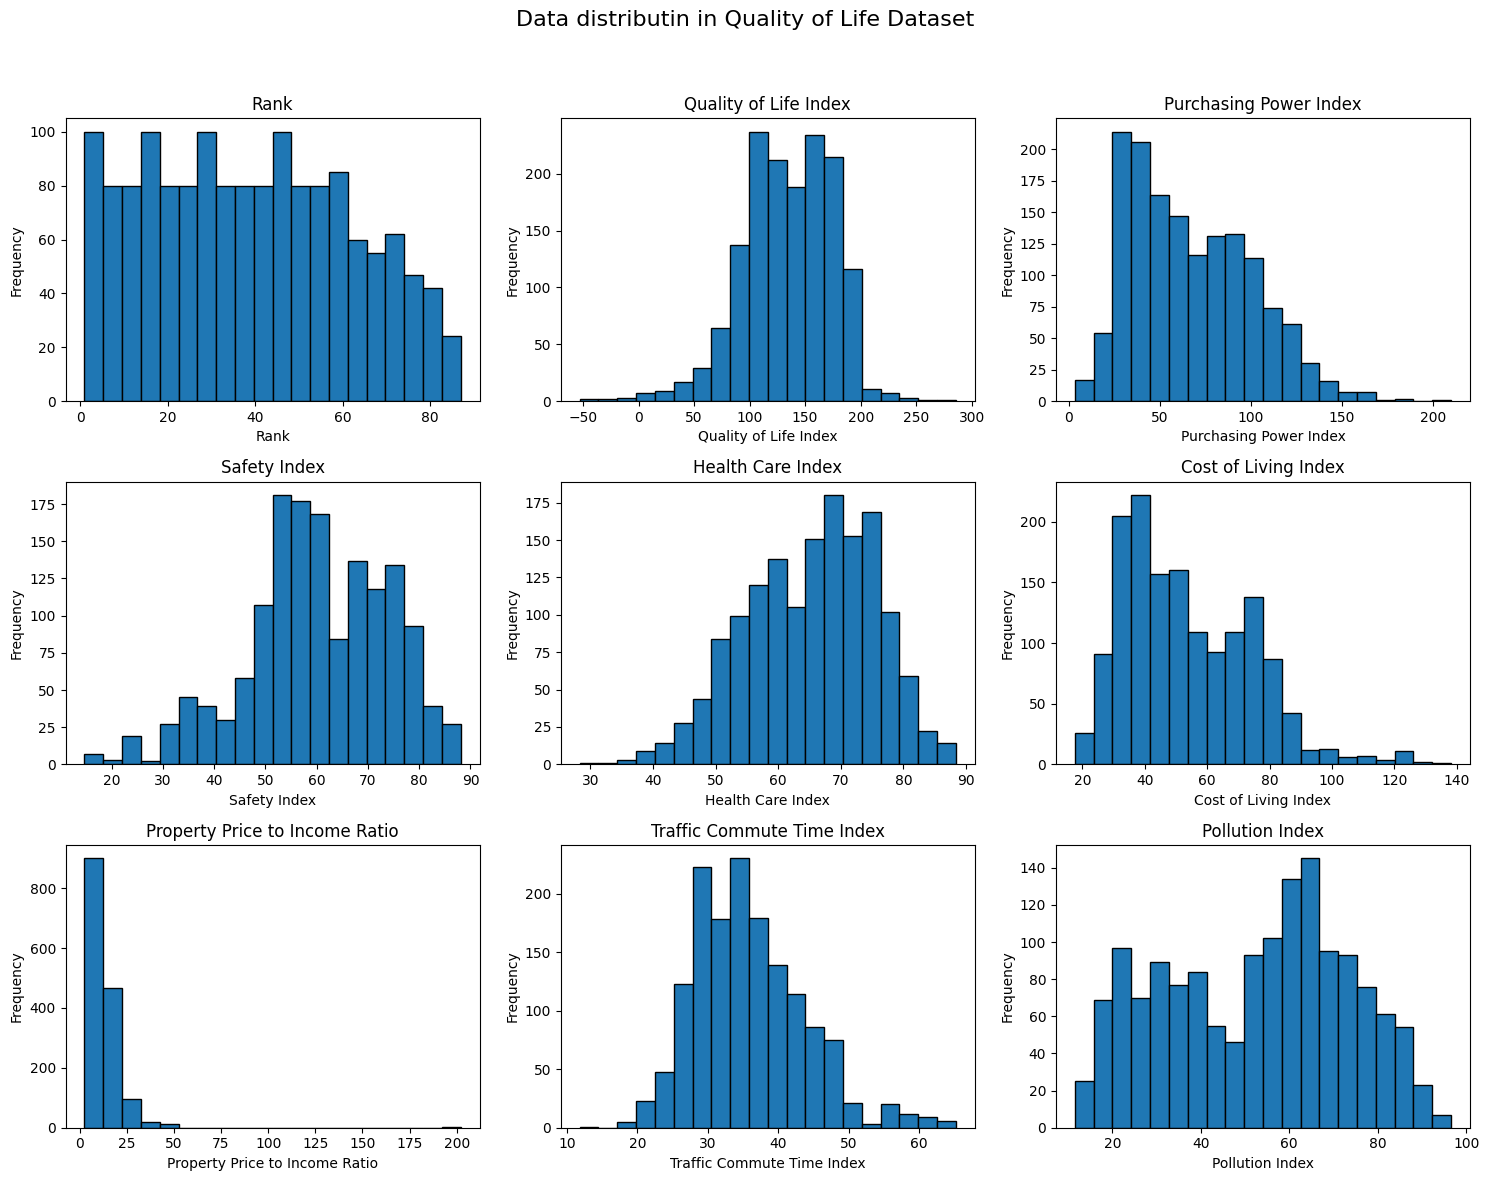

<Figure size 640x480 with 0 Axes>

In [54]:
numeric_cols_qol = qol_df.select_dtypes(include=[np.number]).columns.tolist()
if numeric_cols_qol:
    ncols = 3  
    nrows = (len(numeric_cols_qol) + ncols - 1) // ncols  
    fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 4 * nrows))
    axes = axes.flatten()  
    for i, col in enumerate(numeric_cols_qol):
        axes[i].hist(qol_df[col].dropna(), bins=20, edgecolor='black')
        axes[i].set_title(col)
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Frequency")
  
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    fig.suptitle("Data distributin in Quality of Life Dataset", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
    plt.savefig(f"figures/data_distribution_qol.png")


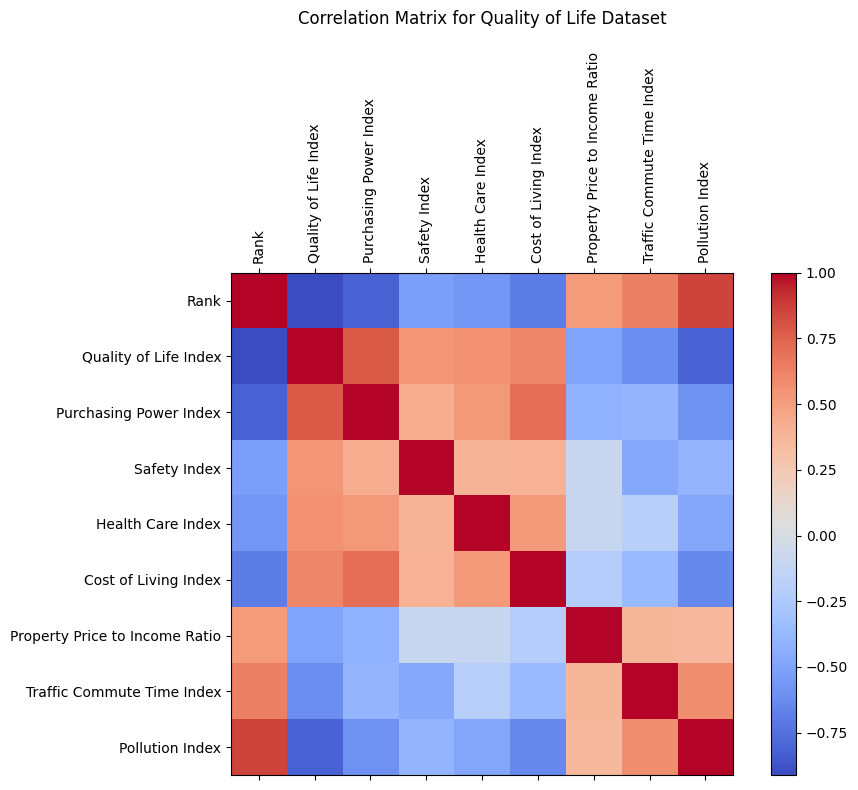

<Figure size 640x480 with 0 Axes>

In [55]:
corr_matrix = qol_df[numeric_cols_qol].corr()
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(corr_matrix, cmap='coolwarm')
fig.colorbar(cax)
ax.set_xticks(range(len(numeric_cols_qol)))
ax.set_xticklabels(numeric_cols_qol, rotation=90)
ax.set_yticks(range(len(numeric_cols_qol)))
ax.set_yticklabels(numeric_cols_qol)
ax.set_title("Correlation Matrix for Quality of Life Dataset", pad=20)
plt.tight_layout()
plt.show()
plt.savefig(f"figures/correlation_matrix_qol.png")

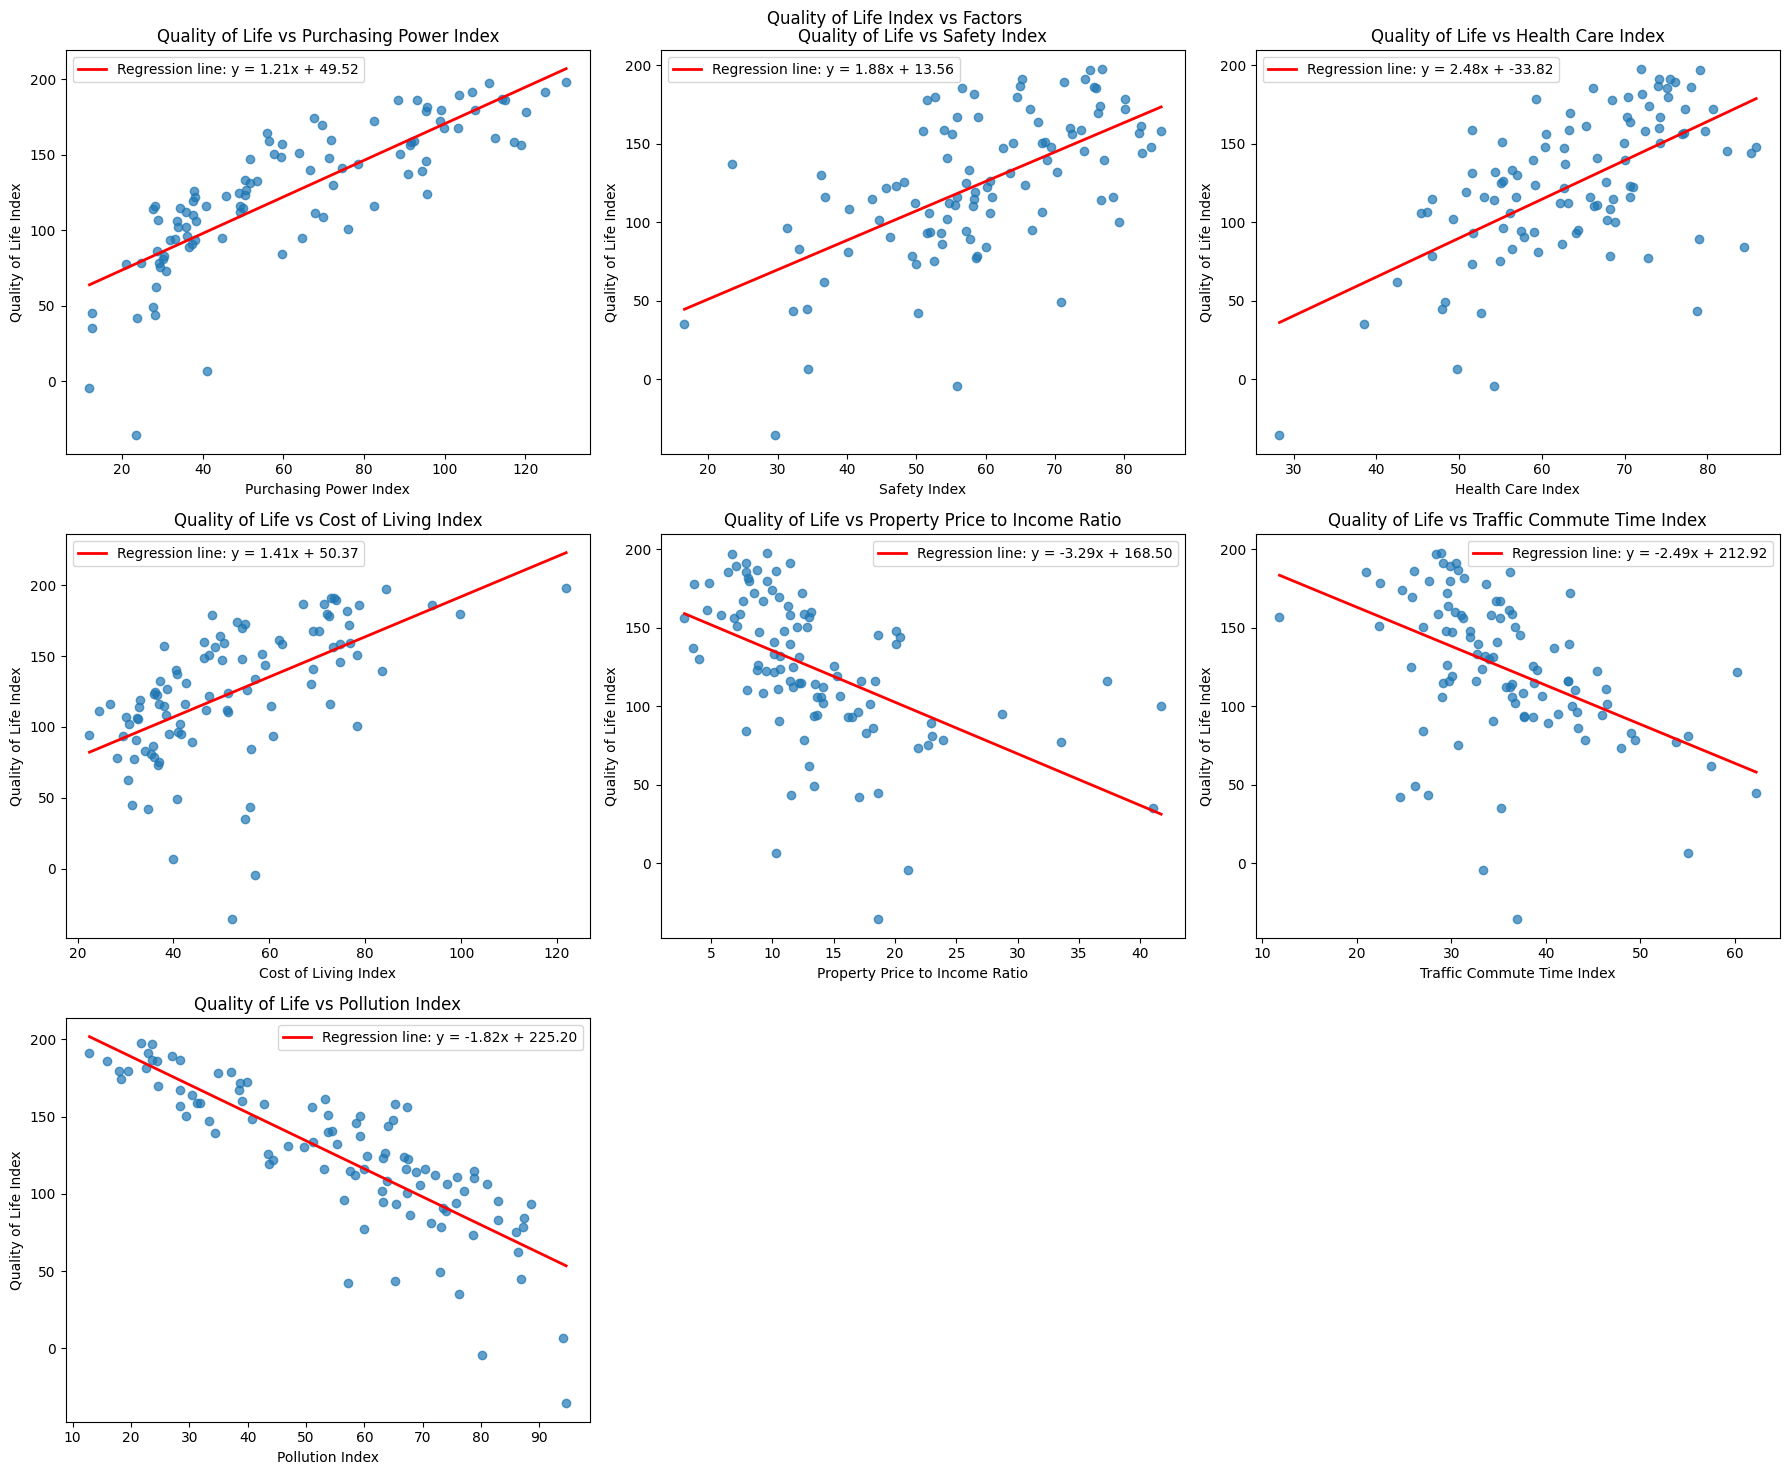

<Figure size 640x480 with 0 Axes>

In [37]:
factors = [
    "Purchasing Power Index",
    "Safety Index",
    "Health Care Index",
    "Cost of Living Index",
    "Property Price to Income Ratio",
    "Traffic Commute Time Index",
    "Pollution Index"
]

n = len(factors)
ncols = 3
nrows = (n + ncols - 1) // ncols 

fig, axes = plt.subplots(nrows, ncols, figsize=(6 * ncols, 5 * nrows))
axes = axes.flatten() 
fig.suptitle("Quality of Life Index vs Factors")
for i, factor in enumerate(factors):

    x = country_agg[factor]
    y = country_agg["Quality of Life Index"]
    
    axes[i].scatter(x, y, alpha=0.7)
    

    mask = x.notna() & y.notna() 
    x_clean = x[mask]
    y_clean = y[mask]
    m, b = np.polyfit(x_clean, y_clean, 1)
    x_vals = np.linspace(x_clean.min(), x_clean.max(), 100)
    y_vals = m * x_vals + b
    axes[i].plot(x_vals, y_vals, color='red', lw=2, label=f'Regression line: y = {m:.2f}x + {b:.2f}')
    
    axes[i].set_xlabel(factor)
    axes[i].set_ylabel("Quality of Life Index")
    axes[i].set_title(f"Quality of Life vs {factor}")
    axes[i].legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
plt.savefig("figures/quality_of_life_vs_factors.png")

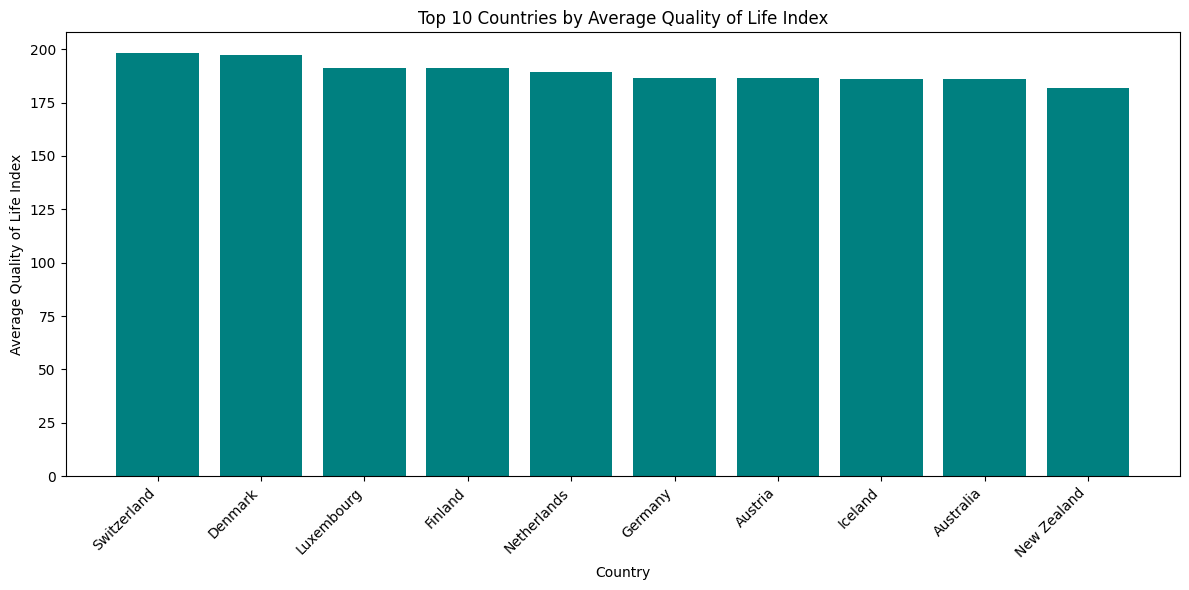

<Figure size 640x480 with 0 Axes>

In [35]:
top10_qol = country_agg.sort_values("Quality of Life Index", ascending=False).head(10)
plt.figure(figsize=(12, 6))
plt.bar(top10_qol["Country"], top10_qol["Quality of Life Index"], color="teal")
plt.xlabel("Country")
plt.ylabel("Average Quality of Life Index")
plt.title("Top 10 Countries by Average Quality of Life Index")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
plt.savefig("figures/top10_countries_qol.png")

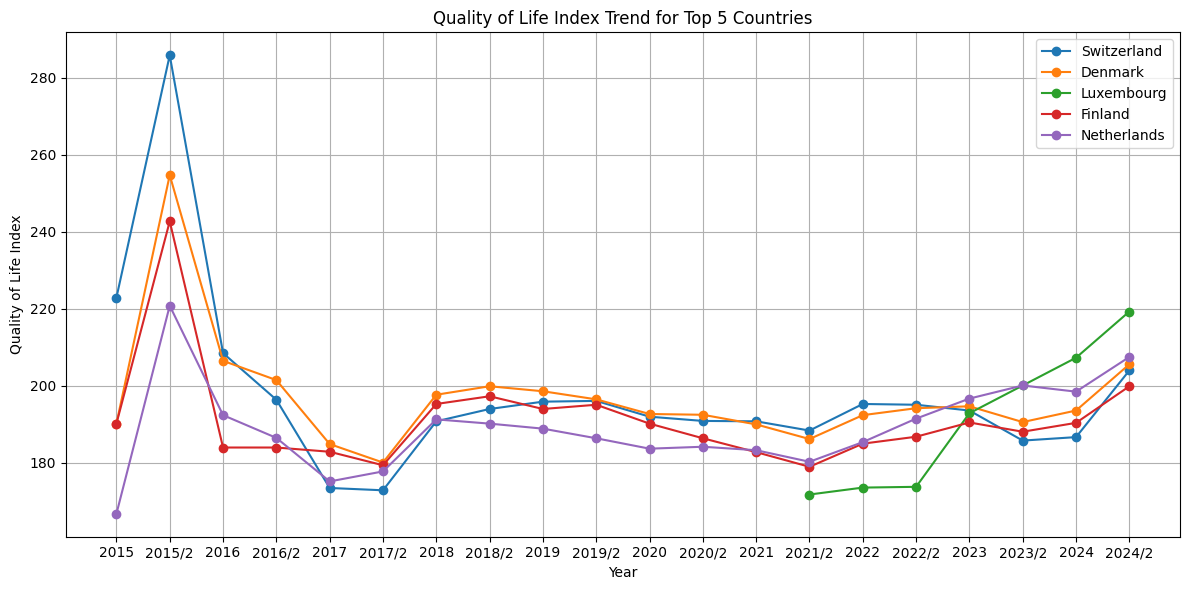

<Figure size 640x480 with 0 Axes>

In [36]:
top5_countries = top10_qol["Country"].head(5).tolist()

plt.figure(figsize=(12, 6))
for country in top5_countries:
    country_data = qol_df[qol_df["Country"] == country].sort_values("Year")
    plt.plot(country_data["Year"], country_data["Quality of Life Index"], marker="o", label=country)
plt.xlabel("Year")
plt.ylabel("Quality of Life Index")
plt.title("Quality of Life Index Trend for Top 5 Countries")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig("figures/top5_countries_qol.png")